In [1]:
import gc # сборщик мусора
import matplotlib
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import scipy as sp
from sklearn.svm import LinearSVC
import datetime # для работы со времнем

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score,RandomizedSearchCV
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist


import optuna
from sklearn.metrics import accuracy_score
from lightgbm import LGBMRegressor
import optuna.integration.lightgbm as lgb
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/barra/libs_python/kaggle/input/train.csv')

X = df.drop('Price', axis=1)
y = df[['Price']]



X_final = pd.read_csv('C:/Users/barra/libs_python/kaggle/input/test.csv')

preds_final = pd.DataFrame()
preds_final['Id'] = X_final['Id'].copy()

X.set_index('Id', inplace=True)
X_final.set_index('Id', inplace=True)

#X['DistrictId'] = X['DistrictId'].astype(str)
#X_final['DistrictId'] = X_final['DistrictId'].astype(str)

2. Очистка данных

In [3]:
# median_rooms = X['Rooms'].median()

# X.loc[8491,'Rooms'] = 1 # замена значения числа комнат по id где 
# #кол-во комнат было 19 шт на 1 так как по площади больше похоже что это 1 комнатная квартира

# X.loc[5927,'Rooms'] = 1  # замена значения числа комнат по id где

# X.loc[14865,'Rooms'] = 1 # замена было значение 10 комнатной по площади больше похоже на 1 комнатную 

# X.loc[X['Rooms'] == 0, 'Rooms'] = median_rooms # замена значений комнат на медиану где значение комнат было равно нулю 



In [4]:

# X_final.loc[3343,'Rooms'] = 3

# X_final.loc[10729,'Rooms'] = 2

# X_final.loc[8494,'Rooms'] = 1

# X_final.loc[11407,'Rooms'] = 1

# X_final.loc[1435, 'Rooms'] = 1

# X_final.loc[(X_final['Square'] <= 13) & (X_final['Rooms'] == 1), 'Square'] = median_rooms

# X_final.loc[(X_final['Square'] <= 30) & (X_final['Rooms'] == 2), 'Square'] = median_rooms


In [5]:
# median_square = X['Square'].median()

# X.loc[(df['Square'] <= 16) & (X['Rooms'] == 1), 'Square'] = median_square

# X.loc[(df['Square'] <= 30) & (X['Rooms'] == 2), 'Square'] = median_square

# X.loc[(df['Square'] <= 44) & (X['Rooms'] == 3), 'Square'] = median_square

# X.loc[28, 'Square'] = 60

# X.loc[2307, 'Square'] = 40

# X.loc[11602, 'Square'] = 64

# X.loc[5548, 'Square'] = 64



# #df.drop(df[df['Square'] > 300].index, inplace=True) # удаление выбросов


In [6]:
# X_final.loc[(X_final['Square'] <= 13) & (X_final['Rooms'] == 1), 'Square'] = median_square

# X_final.loc[(X_final['Square'] <= 30) & (X_final['Rooms'] == 2), 'Square'] = median_square


# X_final.loc[1397, 'Square'] = 122

# X_final.loc[4058, 'Square'] = 123


In [7]:
# median_life_square = df['LifeSquare'].median()

# #LifeSquare = df['Square'] * median_life_square / median_square

# #df.loc['LifeSquare'] = df.loc['Square'] - df.loc['LifeSquare'] - df.loc['KitchenSquare']

# df.loc[(df['LifeSquare'] <= 12) & (df['Rooms'] == 1), 'LifeSquare'] = median_life_square

# df.loc[(df['LifeSquare'] <= 15) & (df['Rooms'] == 2), 'LifeSquare'] = median_life_square

# df.loc[(df['LifeSquare'] <= 15) & (df['Rooms'] == 3), 'LifeSquare'] = median_life_square

# df.loc[(df['LifeSquare'] <= 15) & (df['Rooms'] == 4), 'LifeSquare'] = median_life_square

# df.loc[14990,'LifeSquare'] = 63

# df.loc[16550,'LifeSquare'] = 74

# df.loc[8961,'LifeSquare'] = 16

# df.loc[15886,'LifeSquare'] = 61

# df.loc[28, 'LifeSquare'] = 40

# df.loc[2307, 'LifeSquare'] = 40

# df.loc[11602, 'LifeSquare'] = 34

# #X[['LifeSquare', ]] = X[['LifeSquare']].isna(LifeSquare)

In [8]:
# X_final.loc[(X_final['LifeSquare'] <= 14) & (X_final['Rooms'] == 1), 'LifeSquare']  = median_life_square

# X_final.loc[(X_final['LifeSquare'] <= 14) & (X_final['Rooms'] == 2), 'LifeSquare'] = median_life_square

# X_final.loc[(X_final['LifeSquare'] <= 14) & (X_final['Rooms'] == 3), 'LifeSquare'] = median_life_square

# X_final.loc[(X_final['LifeSquare'] <= 14) & (X_final['Rooms'] == 4), 'LifeSquare'] = median_life_square

# X_final.loc[11533, 'LifeSquare'] = 30





# #X_final.loc[(X_final['LifeSquare'] >= 100), ] #= median_life_square

In [9]:
# median_kitchen_square = df['KitchenSquare'].median()

# df.loc[(df['KitchenSquare'] <= 4), 'KitchenSquare'] = median_kitchen_square

# df.loc[(df['KitchenSquare'] >= 20), 'KitchenSquare'] = median_kitchen_square



In [10]:

# X_final.loc[(X_final['KitchenSquare'] == 0), 'KitchenSquare'] = median_kitchen_square

# X_final.loc[(X_final['KitchenSquare'] == 1), 'KitchenSquare'] = median_kitchen_square

# X_final.loc[(X_final['KitchenSquare'] >= 40), 'KitchenSquare'] = median_kitchen_square

In [11]:
# X['LifeSquare_nan'] = X['LifeSquare'].isna() * 1
        
# condition = (X['LifeSquare'].isna()) &\
#             (~X['Square'].isna()) & \
#             (~X['KitchenSquare'].isna())
        
# X.loc[condition, 'LifeSquare'] = X.loc[condition, 'Square'] - X.loc[condition, 'KitchenSquare'] - 3

# X_final['LifeSquare_nan'] = X_final['LifeSquare'].isna() * 1
        
# condition = (X_final['LifeSquare'].isna()) &\
#             (~X_final['Square'].isna()) & \
#             (~X_final['KitchenSquare'].isna())
        
# X_final.loc[condition, 'LifeSquare'] = X_final.loc[condition, 'Square'] - X_final.loc[condition, 'KitchenSquare'] - 3

In [12]:
# median_HouseFloor = X['HouseFloor'].median()


# X.loc[(X['HouseFloor'] >= 50), 'HouseFloor'] = median_HouseFloor



In [13]:
# X.loc[X['HouseYear'] == 20052011,'HouseYear'] = 2011 
# X.loc[X['HouseYear'] == 4968,'HouseYear'] = 1968

In [14]:
# median_Floor = X['Floor'].median()


# X.loc[(X['Floor']>X['HouseFloor']) & (X['HouseFloor']==0),'HouseFloor'] = X.loc[(X['Floor']>X['HouseFloor']) & (X['HouseFloor']==0),'Floor']
# X.loc[X['Floor']>X['HouseFloor'],'Floor'] = median_Floor
# X.loc[X['Floor']>X['HouseFloor'],'HouseFloor'] = median_HouseFloor

# X_final.loc[(X_final['Floor']> X_final['HouseFloor']) & (X_final['HouseFloor']==0),'HouseFloor'] = X_final.loc[(X_final['Floor'] > X_final['HouseFloor']) & (X_final['HouseFloor']==0),'Floor']
# X_final.loc[X_final['Floor'] > X_final['HouseFloor'],'Floor'] = median_Floor
# X_final.loc[X_final['Floor'] > X_final['HouseFloor'],'HouseFloor'] = median_HouseFloor

In [15]:
class FeatureImputer:
    """Заполнение пропусков и облработка выбросов"""
    
    def __init__(self):
        self.medians=None
        
    def fit(self, X):
        self.medians = X.median()
    
    def transform(self, X):
        
        # Rooms
        
        X.loc[X['Rooms'] == 0, 'Rooms'] = self.medians['Rooms'] # замена значений комнат на медиану где значение комнат было равно нулю 
        
        # Square
        

        X.loc[(X['Square'] <= 16) & (X['Rooms'] == 1), 'Square'] = self.medians['Square']

        X.loc[(X['Square'] <= 30) & (X['Rooms'] == 2), 'Square'] = self.medians['Square']

        X.loc[(X['Square'] <= 44) & (X['Rooms'] == 3), 'Square'] = self.medians['Square']

        
        
        # LifeSquare
        
        X.loc[(X['LifeSquare'] <= 12) & (X['Rooms'] == 1), 'LifeSquare'] = self.medians['LifeSquare']

        X.loc[(X['LifeSquare'] <= 15) & (X['Rooms'] == 2), 'LifeSquare'] = self.medians['LifeSquare']

        X.loc[(X['LifeSquare'] <= 15) & (X['Rooms'] == 3), 'LifeSquare'] = self.medians['LifeSquare']

        X.loc[(X['LifeSquare'] <= 15) & (X['Rooms'] == 4), 'LifeSquare'] = self.medians['LifeSquare']

        #KitchenSquare
        X.loc[(X['KitchenSquare'] <= 4), 'KitchenSquare'] = self.medians['KitchenSquare']

        X.loc[(X['KitchenSquare'] >= 20), 'KitchenSquare'] = self.medians['KitchenSquare']
        
        
        
        
        #HouseFloor, Floor
        X['HouseFloor_outlier'] = 0
        X.loc[X['HouseFloor'] == 0, 'HouseFloor_outlier'] = 1
        X.loc[X['Floor'] > X['HouseFloor'], 'HouseFloor_outlier'] = 1
        
        X.loc[X['HouseFloor'] == 0, 'HouseFloor'] = self.medians['HouseFloor']
        X.loc[X['Floor'] > X['HouseFloor'], 'Floor'] = X.loc[X['Floor'] > X['HouseFloor'], 'HouseFloor']
        
        #HouseYear
        current_year = now = datetime.datetime.now().year
        
        X['HouseYear_outlier'] = 0
        X.loc[X['HouseYear'] > current_year, 'HouseYear_outlier'] = 1
        
        X.loc[X['HouseYear'] > current_year, 'HouseYear'] = current_year
        
        # Healthcare_1
        if 'Healthcare_1' in X.columns:
            X.drop('Healthcare_1', axis=1, inplace=True)
            
        #LifeSquare
        X['LifeSquare_nan'] = X['LifeSquare'].isna() * 1
        
        condition = (X['LifeSquare'].isna()) &\
                        (~X['Square'].isna()) & \
                        (~X['KitchenSquare'].isna())
        
        X.loc[condition, 'LifeSquare'] = X.loc[condition, 'Square'] - X.loc[condition, 'KitchenSquare'] - 3
        X.loc[condition, 'LifeSquare'] = (X.loc[condition, 'Square'] * self.medians['LifeSquare']) / self.medians['Square']
        return X

In [16]:
imputer = FeatureImputer()

imputer.fit(X)

X = imputer.transform(X)
X_final = imputer.transform(X_final)

In [17]:
X.loc[8491,'Rooms'] = 1 # замена значения числа комнат по id где 
                    #кол-во комнат было 19 шт на 1 так как по площади больше похоже что это 1 комнатная квартира

X.loc[5927,'Rooms'] = 1  # замена значения числа комнат по id где

X.loc[14865,'Rooms'] = 1 # замена было значение 10 комнатной по площади больше похоже на 1 комнатную


X.loc[28, 'Square'] = 60

X.loc[2307, 'Square'] = 40
    
X.loc[11602, 'Square'] = 64

X.loc[5548, 'Square'] = 64


X.loc[14990,'LifeSquare'] = 63

X.loc[16550,'LifeSquare'] = 74

X.loc[8961,'LifeSquare'] = 16

X.loc[15886,'LifeSquare'] = 61

X.loc[28, 'LifeSquare'] = 40

X.loc[2307, 'LifeSquare'] = 40

X.loc[11602, 'LifeSquare'] = 34


X_final.loc[11533, 'LifeSquare'] = 30

X.loc[X['HouseYear'] == 20052011,'HouseYear'] = 2011 
X.loc[X['HouseYear'] == 4968,'HouseYear'] = 1968

3. Feature engineering

In [18]:
class FeatureGenetator():
    """Генерация новых фич"""
    
    def __init__(self):
        self.DistrictId_counts = None
        self.binary_to_numbers = None
        self.med_price_by_district = None
        self.med_price_by_district_social = None
        self.med_price_by_floor_year = None
        self.med_price_by_ecology = None
        self.med_price_by_district_rooms = None
        self.med_price_by_square = None
        self.med_price_by_shop = None
        
    def fit(self, X, y=None):
        
        X = X.copy()
        
        # DistrictID
        district = X['DistrictId'].value_counts()
        district = district[district > 25]
        
        self.DistrictId_counts = dict(district)
        
        # Binary features
        self.binary_to_numbers = {'A': 0, 'B': 1}
        
        # Target encoding
        ## District
        df = X.copy()
        if y is not None:
            df['Price'] = y.values
            
            df['DistrictId_popular'] = df['DistrictId'].copy()
            df.loc[~df['DistrictId_popular'].isin(district.keys().tolist())] = np.nan
            
            self.med_price_by_district = df.groupby(['DistrictId', 'Rooms', 'Social_1', 'Social_2', 'Helthcare_2'], as_index=False).agg({'Price':'median'}).\
                                            rename(columns={'Price':'MedPriceByDistrict',
                                                           'DistrictId_popular': 'DistrictId'})
            
        ## floor
        if y is not None:
            df['Price'] = y.values
            df = self.floor_to_cat(df)
            self.med_price_by_floor = df.groupby(['DistrictId', 'floor_cat'], as_index=False).agg({'Price':'median'}).\
                                            rename(columns={'Price':'MedPriceByFloor'})
            
        ## ecology
        if y is not None:
            df['Price'] = y.values
            df['DistrictId_popular'] = df['DistrictId'].copy()
            df.loc[~df['DistrictId_popular'].isin(district.keys().tolist())] = np.nan
            self.med_price_by_ecology = df.groupby(['DistrictId_popular', 'Ecology_1'], as_index=False).agg({'Price':'median'}).\
                                            rename(columns={'Price':'MedPriceByEcology',
                                                           'DistrictId_popular': 'DistrictId'})
       
        ## Year
        if y is not None:
            df['Price'] = y.values
            df = self.year_to_cat(df)
            self.med_price_by_year = df.groupby(['DistrictId', 'year_cat'], as_index=False).agg({'Price':'median'}).\
                                            rename(columns={'Price':'MedPriceByYear'})
            
        ## floor, year
        if y is not None:
            df['Price'] = y.values
            df = self.floor_to_cat(df)
            df = self.year_to_cat(df)
            self.med_price_by_floor_year = df.groupby(['year_cat', 'floor_cat'], as_index=False).agg({'Price':'median'}).\
                                            rename(columns={'Price':'MedPriceByFloorYear'})
        
        if y is not None:
            df['Price'] = y.values
            df['DistrictId_popular'] = df['DistrictId'].copy()
            df.loc[~df['DistrictId_popular'].isin(district.keys().tolist())] = np.nan
            self.med_price_by_shop = df.groupby(['DistrictId_popular', 'Shops_1'], as_index=False).agg({'Price':'median'}).\
                                            rename(columns={'Price':'MedPriceByShop1',
                                                           'DistrictId_popular': 'DistrictId'})
            
        
    def transform(self, X):
        
        # DistrictId
        X['DistrictId_count'] = X['DistrictId'].map(self.DistrictId_counts)
        
        X['new_district'] = 0
        X.loc[X['DistrictId_count'].isna(), 'new_district'] = 1
        
        X['DistrictId_count'].fillna(5, inplace=True)
        
        # Binary features
        X['Ecology_2'] = X['Ecology_2'].map(self.binary_to_numbers)
        X['Ecology_3'] = X['Ecology_3'].map(self.binary_to_numbers)
        X['Shops_2'] = X['Shops_2'].map(self.binary_to_numbers)
        
        # More categorical features
        X = self.floor_to_cat(X)
        X = self.year_to_cat(X) 
        
        # Target encoding
        if self.med_price_by_district is not None:
            X = X.merge(self.med_price_by_district, on=['DistrictId', 'Rooms', 'Social_1', 'Social_2', 'Helthcare_2'], how='left')
        if self.med_price_by_floor is not None:
            X = X.merge(self.med_price_by_floor, on=['DistrictId', 'floor_cat'], how='left')
        if self.med_price_by_year is not None:
            X = X.merge(self.med_price_by_year, on=['DistrictId', 'year_cat'], how='left')
        if self.med_price_by_floor_year is not None:
            X = X.merge(self.med_price_by_floor_year, on=['year_cat', 'floor_cat'], how='left')
        if self.med_price_by_ecology is not None:
            X = X.merge(self.med_price_by_ecology, on=['DistrictId','Ecology_1'], how='left')
        if self.med_price_by_shop is not None:
            X = X.merge(self.med_price_by_shop, on=['DistrictId','Shops_1'], how='left')  
        
        return X
    
    @staticmethod
    def floor_to_cat(X):
        
        #X['floor_cat'] = np.nan
        
        
        X.loc[X['Floor'] == 1, 'floor_cat'] = 1  
        X.loc[(X['Floor'] == 1) & (X['HouseFloor'] == 1), 'floor_cat'] = 3
        X.loc[(X['Floor'] >= 1) & (X['HouseFloor'] == 3), 'floor_cat'] = 4
        X.loc[(X['Floor'] == 1) & (X['HouseFloor'] == 5), 'floor_cat'] = 5
        X.loc[(X['Floor'] == 5) & (X['HouseFloor'] == 5), 'floor_cat'] = 6
        X.loc[(X['Floor'] >= 2) & (X['Floor'] <= 4) & (X['HouseFloor'] == 5), 'floor_cat'] = 7
        X.loc[(X['Floor'] > 5) & (X['Floor'] <= 9), 'floor_cat'] = 8
        X.loc[(X['Floor'] > 9) & (X['Floor'] <= 15), 'floor_cat'] = 9
        X.loc[X['Floor'] > 15, 'floor_cat'] = 10
            
        return X
     
    @staticmethod
    def year_to_cat(X):
        
        #X['year_cat'] = np.nan
        
        X.loc[X['HouseYear'] < 1940, 'year_cat'] = 1
        X.loc[(X['HouseYear'] > 1940) & (X['HouseYear'] <= 1949), 'year_cat'] = 2
        X.loc[(X['HouseYear'] > 1950) & (X['HouseYear'] <= 1959), 'year_cat'] = 3
        X.loc[(X['HouseYear'] > 1960) & (X['HouseYear'] <= 1969), 'year_cat'] = 4
        X.loc[(X['HouseYear'] > 1970) & (X['HouseYear'] <= 1979), 'year_cat'] = 5
        X.loc[(X['HouseYear'] > 1980) & (X['HouseYear'] <= 1989), 'year_cat'] = 6
        X.loc[(X['HouseYear'] > 1990) & (X['HouseYear'] <= 1999), 'year_cat'] = 7
        X.loc[(X['HouseYear'] > 2000) & (X['HouseYear'] <= 2010), 'year_cat'] = 8
        X.loc[(X['HouseYear'] > 2011), 'year_cat'] = 9
            
        return X
            
    

In [19]:
features = FeatureGenetator()

features.fit(X, y)

X = features.transform(X)
X_final = features.transform(X_final)

In [20]:
# params = {#'n_estimators':np.arange(50, 300, 1), 
#         #'max_depth':np.arange(1, 20, 1), 
#          #'min_samples_leaf':np.arange(1, 100, 1),
#            #'num_leaves':np.arange(1, 100, 1)
#           #'max_bin':np.arange(20, 200, 1)
#             'min_child_samples':np.arange(1, 50, 1)
          
            
#                                             }

# gs = GridSearchCV(model, params, 
#                   scoring='r2', # метрика 
#                   cv=KFold(n_splits=5,   # k (кол-во разбиений/итераций) в кросс-валидации
#                          random_state=42, 
#                           shuffle=True 
                           
                          
#                ),
#                 n_jobs=-1   # Кол-во потоков 
#                )
# gs.fit(X_train, y_train)  # НА TRAIN!

In [21]:
# res = pd.DataFrame(gs.cv_results_)
# res.head(5)

In [22]:
# gs.best_params

In [23]:
# gs.best_score_


In [24]:
# remain_features = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'Ecology_1', 'Social_1', 'Shops_1',
#                    'HouseFloor_outlier', 'HouseYear_outlier', 'LifeSquare_nan',
#                    'HouseFloor', 'HouseYear','Social_2','Social_3','Helthcare_2',
#                    'clusters_7_1','clusters_7_2','clusters_7_3', 'clusters_7_4', 'clusters_7_5','clusters_7_6',
#                   'DistrictId_count', 'new_district', 'Ecology_2', 'Ecology_3', 'Shops_2',
#                   'MedPriceByDistrict', 'MedPriceByShop1',
#                   'MedPriceByEcology']

# X = X_train_scaled[remain_features]
# X_final = X_test_scaled[remain_features]

4. Модель

In [25]:
# X = X.drop(['HouseYear_outlier','Ecology_2','new_district'], axis=1)
# X_final = X_final.drop(['HouseYear_outlier','Ecology_2','new_district'], axis=1)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
model = LGBMRegressor( max_depth=5,
                             min_child_samples=41,
                             max_bin=52,
                             num_leaves=17,
                             n_estimators=288,
                             random_state=42
                            
                                           )

cv_score = cross_val_score(model, X_train, y_train, 
                           scoring='r2', 
                           cv=KFold(n_splits=5, shuffle=True, random_state=42))
# cv_score
mean = cv_score.mean()
std = cv_score.std()

print('R2: {:.3f} +- {:.3f}'.format(mean, std))

R2: 0.770 +- 0.008


In [28]:
model.fit(X, y)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_bin=52,
              max_depth=5, min_child_samples=41, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=288, n_jobs=-1, num_leaves=17,
              objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)

In [29]:
y_pred_test = model.predict(X_test)
print('R2 test:', r2_score(y_test, y_pred_test))

R2 test: 0.8638478324796035


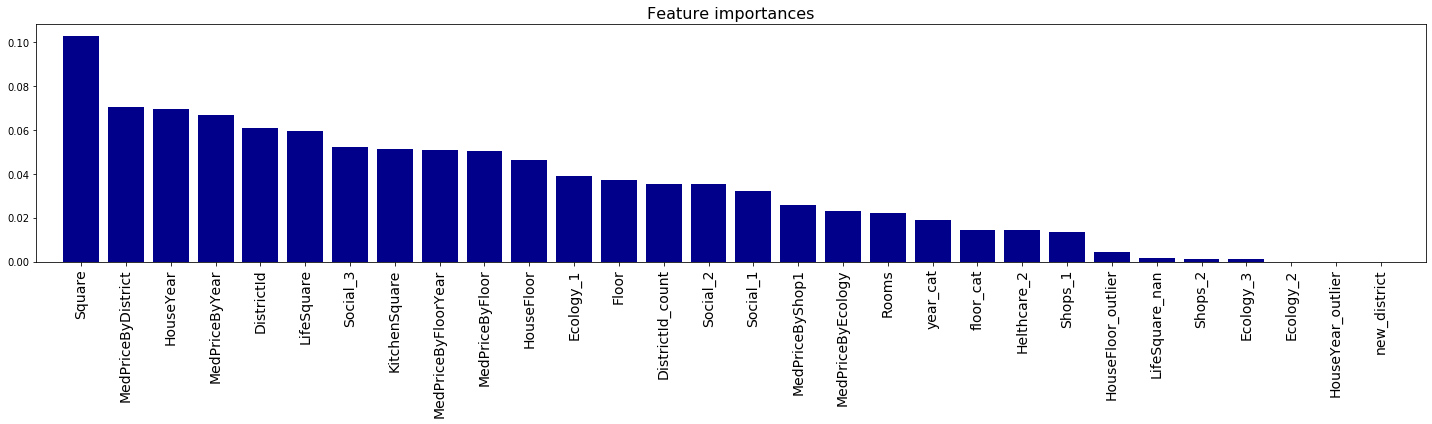

In [30]:
def plot_feature_importances(importances, X):
    
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize = (20, 6))
    plt.title("Feature importances", fontsize=16)
    plt.bar(range(X.shape[1]), importances[indices] / importances.sum(),
           color="darkblue", align="center")
    plt.xticks(range(X.shape[1]), X.columns[indices], rotation = 90, fontsize=14)
    plt.xlim([-1, X.shape[1]])

    plt.tight_layout()
    # plt.savefig('fe.jpg')
    plt.show()
    
plot_feature_importances(importances = model.feature_importances_, X=X)

In [31]:
y_pred_final = model.predict(X_final)

preds_final['Price'] = y_pred_final
preds_final.to_csv('predictions.csv', index=False)

preds_final.describe()




,Id,Price
count,5000.000000,5000.000000
mean,8412.595400,216078.626765
std,4832.674037,81466.581618
min,1.000000,67587.782797
25%,4221.750000,164040.735056
50%,8320.500000,195683.703491
75%,12598.250000,249275.746457
max,16795.000000,568277.996140


In [32]:
preds_final.shape

(5000, 2)

In [33]:
feature_importances = pd.DataFrame(zip(X_train.columns, 
                                       model.feature_importances_ / model.feature_importances_.sum()), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False, inplace=True)




In [34]:
feature_importances

,feature_name,importance
2,Square,0.102969
24,MedPriceByDistrict,0.070452
7,HouseYear,0.069510
26,MedPriceByYear,0.066682
0,DistrictId,0.061027
3,LifeSquare,0.059378
13,Social_3,0.052074
4,KitchenSquare,0.051367
27,MedPriceByFloorYear,0.050660
25,MedPriceByFloor,0.050424
